In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


# Accidentalidad en Barranquilla

In [ ]:
#df = pd.read_csv("Accidentalidad_en_Barranquilla.csv")
df = pd.read_csv('/content/drive/MyDrive/Datos/Accidentalidad_en_Barranquilla.csv')
df.columns = [col.replace("\n", " ").strip() for col in df.columns]
df

,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,01/01/2015 12:00:00 AM,2015,enero,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2.0,NaN,1
1,01/01/2015 12:00:00 AM,2015,enero,Jue,04:20:00:AM,Solo daños,Choque,CRA 15 CLLE 21,NaN,NaN,1
2,01/01/2015 12:00:00 AM,2015,enero,Jue,04:40:00:PM,Con heridos,Choque,CRA 14 CLLE 35,2.0,NaN,1
3,01/01/2015 12:00:00 AM,2015,enero,Jue,04:50:00:PM,Con heridos,Atropello,CRA 6 CLLE 90,1.0,NaN,1
4,01/01/2015 12:00:00 AM,2015,enero,Jue,06:00:00:AM,Solo daños,Choque,CRA 6 CLLE 92,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
42342,12/30/2022 12:00:00 AM,2022,diciembre,Vie,02:30:00:PM,Con heridos,Choque,CALLE 110 CARRERA 32,1.0,NaN,1
42343,12/30/2022 12:00:00 AM,2022,diciembre,Vie,03:45:00:PM,Con heridos,Atropello,CALLE 33 CARRERA 43,1.0,NaN,1
42344,12/30/2022 12:00:00 AM,2022,diciembre,Vie,05:50:00:PM,Con heridos,Choque,CALLE 94 CON CRA 2B,1.0,NaN,1
42345,12/31/2022 12:00:00 AM,2022,diciembre,Sáb,07:35:00:PM,Con heridos,Choque,CARRERA 45 CALLE 82,2.0,NaN,1


## Graficas

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Grafica 1

Cantidad de heridos y muertos por cada tipo de accidente

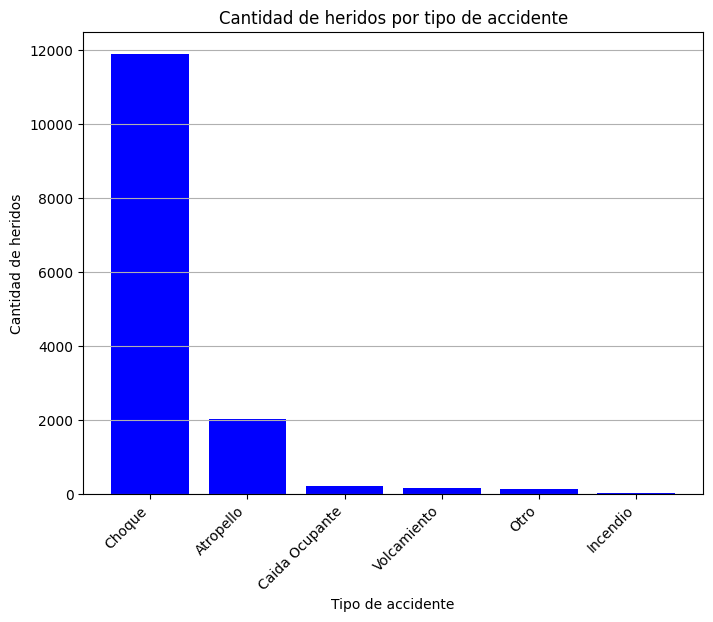

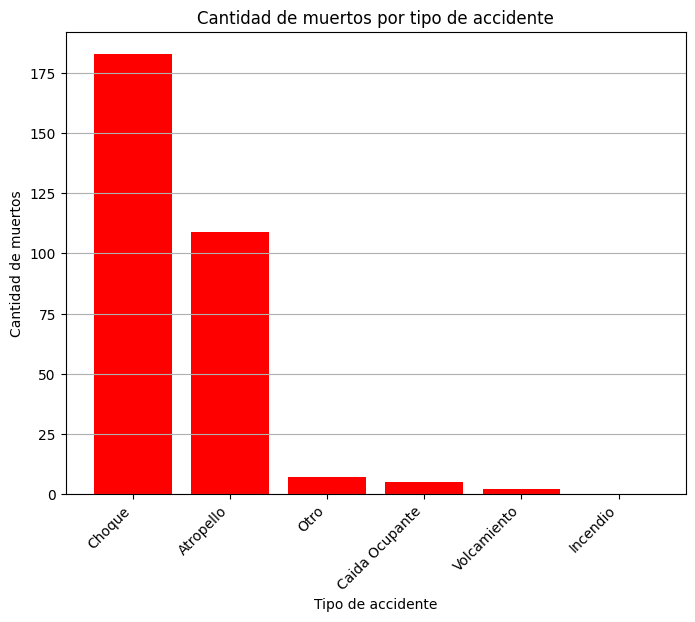

In [ ]:
# Gráfica de cantidad de heridos por tipo de accidente
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df1["CLASE_ACCIDENTE"], df1["CANT_HERIDOS_EN _SITIO_ACCIDENTE"], color="blue")
ax.set_xticklabels(df1["CLASE_ACCIDENTE"], rotation=45, ha="right")
ax.set_xlabel("Tipo de accidente")
ax.set_ylabel("Cantidad de heridos")
ax.set_title("Cantidad de heridos por tipo de accidente")
ax.grid(axis="y")

plt.show()

# Gráfica de cantidad de muertos por tipo de accidente
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df2["CLASE_ACCIDENTE"], df2["CANT_MUERTOS_EN _SITIO_ACCIDENTE"], color="red")
ax.set_xticklabels(df2["CLASE_ACCIDENTE"], rotation=45, ha="right")
ax.set_xlabel("Tipo de accidente")
ax.set_ylabel("Cantidad de muertos")
ax.set_title("Cantidad de muertos por tipo de accidente")
ax.grid(axis="y")

plt.show()

### Grafica 2

In [ ]:
df3 = df.copy()

df3 = df3[["AÑO_ACCIDENTE","MES_ACCIDENTE","DIA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df4 = df3[["MES_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df3 = df3.groupby("AÑO_ACCIDENTE").sum().reset_index()
df4 = df4.groupby("MES_ACCIDENTE").sum().reset_index()



In [ ]:
df4["MES_ACCIDENTE"]

0          abril
1         agosto
2      diciembre
3          enero
4        febrero
5          julio
6          junio
7          marzo
8           mayo
9      noviembre
10       octubre
11    septiembre
Name: MES_ACCIDENTE, dtype: object

In [ ]:
fig = px.bar(df3,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="AÑO_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "AÑO_ACCIDENTE": "Año",
                 })
fig.show()
fig = px.bar(df4,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="MES_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "MES_ACCIDENTE": "Mes",
                 })
fig.show()

### Grafica 3

In [ ]:
df5 = df.copy()
df5 = df5[["HORA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df5 = df5.groupby("HORA_ACCIDENTE").sum().reset_index()
df5["HORA_ACCIDENTE"] = pd.to_datetime(df5["HORA_ACCIDENTE"],format='%I:%M:%S:%p')
df5["HORA_ACCIDENTE_FORMATO"] =df5["HORA_ACCIDENTE"].dt.strftime("%H")
df5 = df5.groupby(["HORA_ACCIDENTE_FORMATO"]).sum().reset_index()[["HORA_ACCIDENTE_FORMATO","CANTIDAD_ACCIDENTES"]]
df5.columns = ["Hora","Cantidad"]
df5 = df5.sort_values(by=['Hora'])

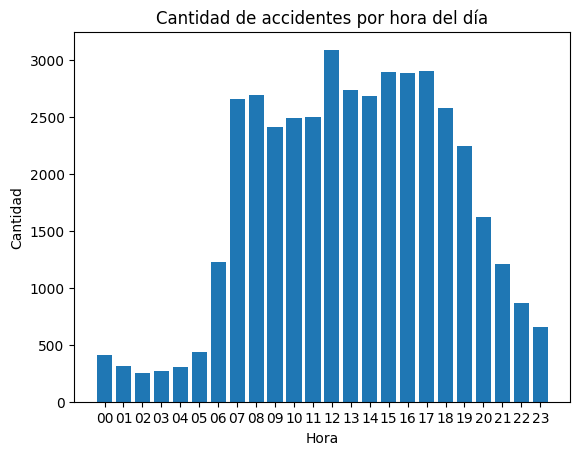

In [ ]:
fig, ax = plt.subplots()
ax.bar(df5["Hora"], df5["Cantidad"])
ax.set_xlabel("Hora")
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de accidentes por hora del día")
plt.show()

AÑO_ACCIDENTE                          Axes(0.125,0.747241;0.133621x0.132759)
CANT_HERIDOS_EN _SITIO_ACCIDENTE    Axes(0.285345,0.747241;0.133621x0.132759)
CANT_MUERTOS_EN _SITIO_ACCIDENTE     Axes(0.44569,0.747241;0.133621x0.132759)
CANTIDAD_ACCIDENTES                 Axes(0.606034,0.747241;0.133621x0.132759)
dtype: object

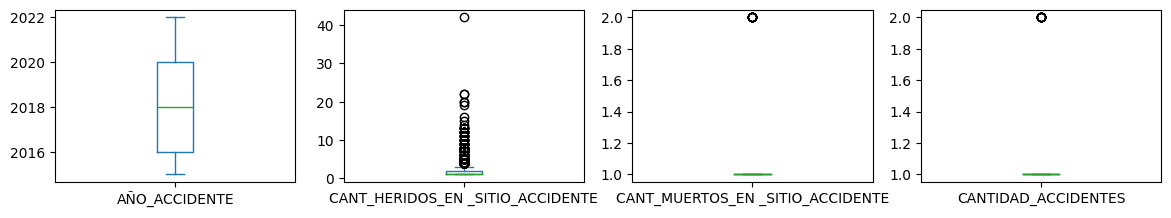

In [ ]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(18,13))


array([[<Axes: title={'center': 'AÑO_ACCIDENTE'}>,
        <Axes: title={'center': 'CANT_HERIDOS_EN _SITIO_ACCIDENTE'}>],
       [<Axes: title={'center': 'CANT_MUERTOS_EN _SITIO_ACCIDENTE'}>,
        <Axes: title={'center': 'CANTIDAD_ACCIDENTES'}>]], dtype=object)

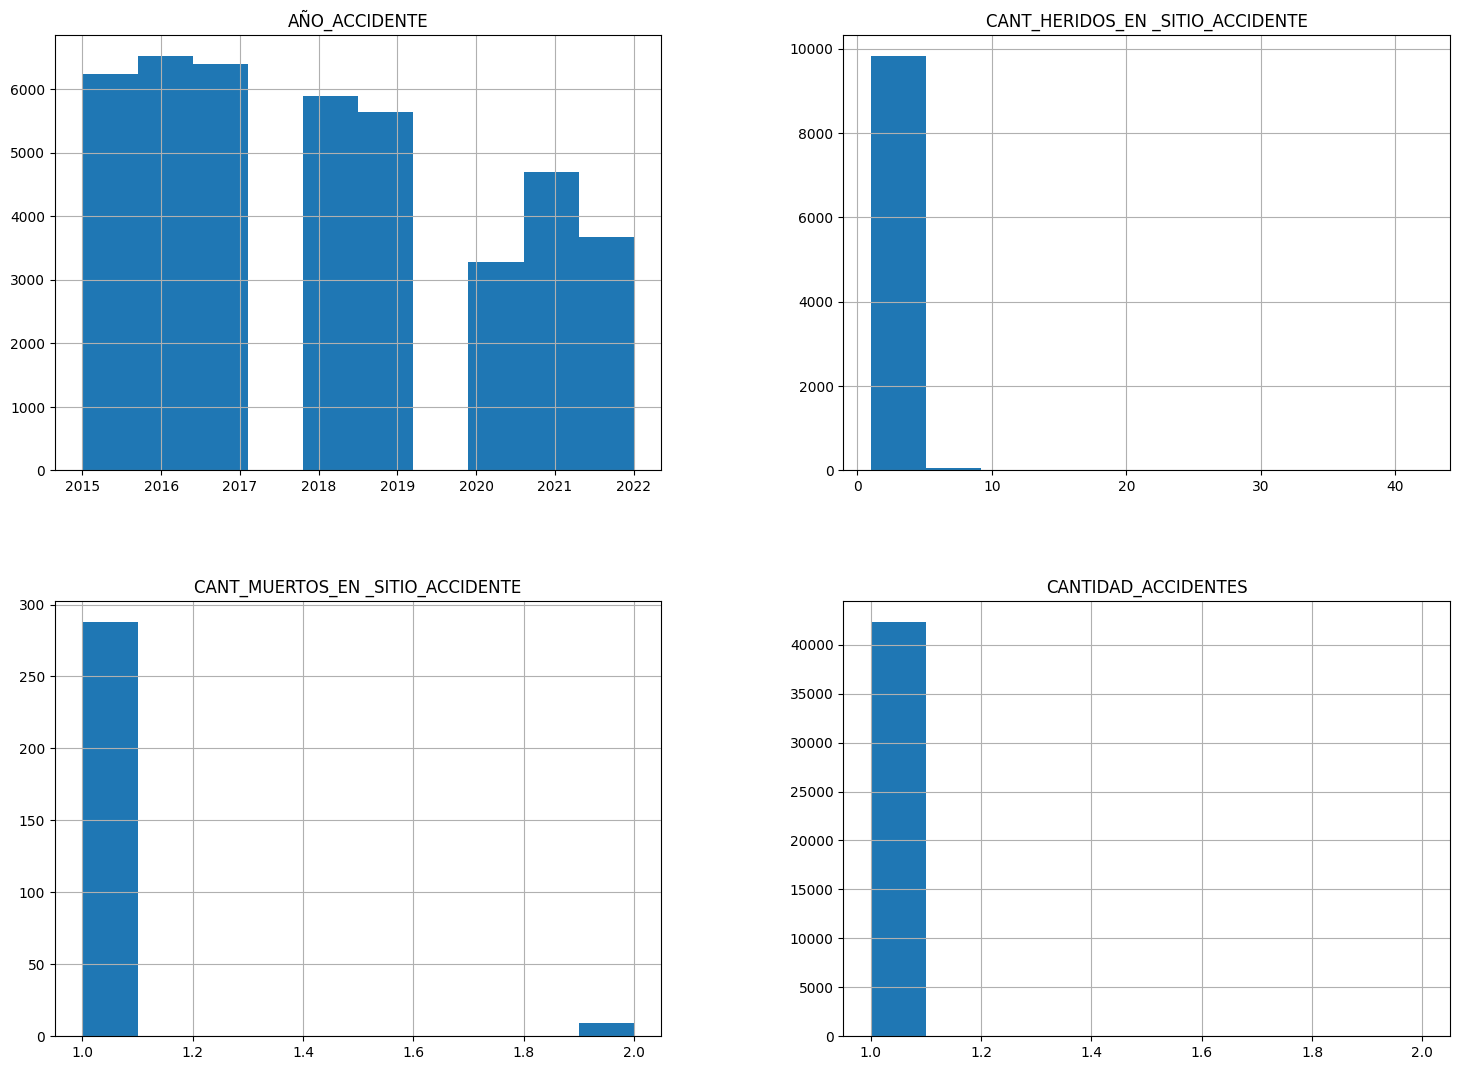

In [ ]:
df.hist(figsize=(18,13))

## ML

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()

Parametros:
- CLASE
- GRAVEDAD
- SITIO

Resultado:
- Cantidad de Heridos
- Cantidad de Muertos

In [ ]:
df_muertos = df[["GRAVEDAD_ACCIDENTE","CLASE_ACCIDENTE","SITIO_EXACTO_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE"]]
df_muertos.columns = ["Gravedad","Clase","Lugar","Heridos"]
df_muertos = df_muertos.apply(lambda x: label_encoder.fit_transform(x))

array = df_muertos.values
parametros = array[:,0:3]
resultados = array[:,3]
df_muertos

,Gravedad,Clase,Lugar,Heridos
0,0,2,9392,1
1,2,2,19765,20
2,0,2,19739,1
3,0,0,21272,0
4,2,2,21274,20
...,...,...,...,...
42342,0,2,1600,0
42343,0,0,2367,0
42344,0,2,5325,0
42345,0,2,6645,1


In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(parametros, resultados, test_size=0.20, random_state=1)

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.929392 (0.000698)
LDA: 0.923134 (0.001665)
KNN: 0.793488 (0.003823)
CART: 0.901202 (0.002744)
NB: 0.925023 (0.001723)


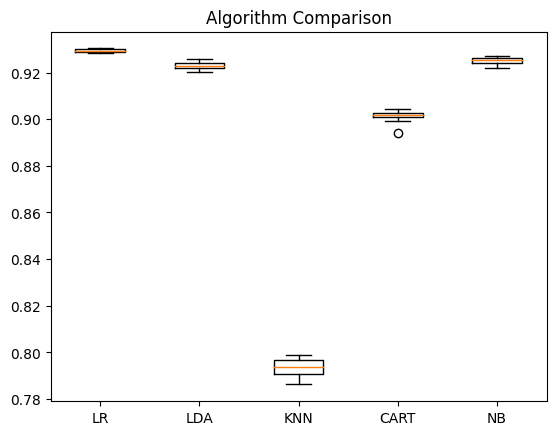

In [ ]:

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)

#"GRAVEDAD_ACCIDENTE","CLASE_ACCIDENTE","SITIO_EXACTO_ACCIDENTE"
# ejemplo = ['Con heridos', 'Choque', 'Calle 46', '2.0']
# ejemplo.columns = ["Gravedad","Clase","Lugar"]
predictions = model.predict(X_validation)
print(predictions)

[20 20 20 ... 20 20 20]


In [ ]:
nuevo_dato = pd.DataFrame({
    'Gravedad': [19],
    'Clase': [19],
    'Lugar': [19],
})

# transformar usando LabelEncoder
nuevo_dato = nuevo_dato.apply(lambda x: label_encoder.transform(x))

# hacer predicciones
prediccion = model.predict(nuevo_dato)

print(prediccion)

[20]


In [ ]:
print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9231404958677686
              precision    recall  f1-score   support

           0       0.68      0.99      0.81      1376
           1       0.00      0.00      0.00       489
           2       0.00      0.00      0.00        88
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          20       1.00      1.00      1.00      6456

    accuracy                           0.92      8470
   macro avg       0.11      0.13      0.12      8470
weighte

#Accidentalidad Barranquilla detalle de Vehículos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/Accidentalidad_Barranquilla_detalle_de_Veh_culos.csv')
df.columns = [col.replace("\n", " ").strip() for col in df.columns]
df

,AÑO_ACCIDENTE,MES_ACCIDENTE,CLASE ACCIDENTE,SERVICIO_VEHICULO_ACCIDENTADO,CLASE_VEHICULO_ACCIDENTADO,CANTIDAD_VEHICULOS,DIRECCION ACCIDENTE
0,2015,1,Choque,PUBLICO,AUTOMOVIL,1,AV CIRCUNVALAR CR 26
1,2015,1,Choque,PUBLICO,BUSETA,1,AV CIRCUNVALAR CR 26
2,2015,1,Choque,PUBLICO,TRACTO/CAMION,1,AV CIRCUNVALAR CR 26
3,2015,1,Choque,PARTICULAR,AUTOMOVIL,1,AV CIRCUNVALAR CR 46
4,2015,1,Choque,PARTICULAR,MOTOCICLETA,1,AV CIRCUNVALAR CR 46
...,...,...,...,...,...,...,...
75835,2022,12,Atropello,PARTICULAR,AUTOMOVIL,1,CALLE 33 CARRERA 43
75836,2022,12,Choque,PARTICULAR,AUTOMOVIL,1,CALLE 53D CARRERA 14
75837,2022,12,Choque,PUBLICO,BUS,1,CALLE 53D CARRERA 14
75838,2022,12,Choque,PARTICULAR,AUTOMOVIL,1,CALLE 110 CARRERA 32


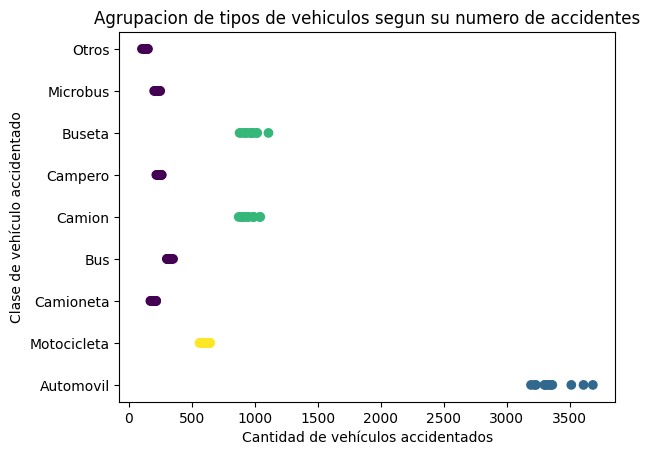

,CLASE_VEHICULO_ACCIDENTADO,MES_ACCIDENTE,CANTIDAD_VEHICULOS,cluster
0,0,1,3308,1
1,0,2,3610,1
2,0,3,3684,1
3,0,4,3222,1
4,0,5,3347,1
...,...,...,...,...
103,8,8,137,0
104,8,9,131,0
105,8,10,138,0
106,8,11,153,0


In [ ]:
le = LabelEncoder()
grouped_data = df.groupby(['CLASE_VEHICULO_ACCIDENTADO', 'MES_ACCIDENTE'])['CANTIDAD_VEHICULOS'].sum().reset_index()

# Filtrar las filas con suma menor a 100 en la columna 'CANTIDAD_VEHICULOS'
grouped_data.loc[grouped_data['CANTIDAD_VEHICULOS'] < 100, 'CLASE_VEHICULO_ACCIDENTADO'] = 'OTROS'

# Agrupar nuevamente los datos por clase de vehículo y mes y sumar las cantidades de vehículos
grouped_data = grouped_data.groupby(['CLASE_VEHICULO_ACCIDENTADO', 'MES_ACCIDENTE'])['CANTIDAD_VEHICULOS'].sum().reset_index()
grouped_data

# Convertir los valores de la columna "Clase de vehiculo" a int
grouped_data['CLASE_VEHICULO_ACCIDENTADO'] = le.fit_transform(grouped_data['CLASE_VEHICULO_ACCIDENTADO'])
X = grouped_data[['CLASE_VEHICULO_ACCIDENTADO', 'CANTIDAD_VEHICULOS']]

# Ajustar el modelo de K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Obtener las etiquetas de cluster
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame
grouped_data['cluster'] = labels

# Crear una lista con los nombres de las clases de vehículos en el orden correcto
class_names = ['Automovil', 'Motocicleta', 'Camioneta', 'Bus', 'Camion', "Campero", 'Buseta', 'Microbus',"Otros"]

# Graficar los resultados y establecer los ticks en el eje y
plt.scatter(grouped_data['CANTIDAD_VEHICULOS'], grouped_data['CLASE_VEHICULO_ACCIDENTADO'], c=labels)
plt.yticks(range(9), class_names)

# Añadir etiquetas a los ejes y al gráfico
plt.xlabel('Cantidad de vehículos accidentados')
plt.ylabel('Clase de vehículo accidentado')
plt.title('Agrupacion de tipos de vehiculos segun su numero de accidentes')
plt.show()
grouped_data

# Elementos cada cluster:  1    16961
2    15082
5    14902
3    10849
0     9637
4     8409
Name: cluster, dtype: int64
Cluster:  [[6.46924356e+00 1.94773483e+00 8.15606816e+00 1.50991947e+03]
 [6.64389784e+00 1.97109656e+00 6.17495429e+00 1.69663142e+04]
 [6.76193946e+00 1.95297079e+00 7.69841690e+00 8.77253434e+03]
 [6.09320783e+00 1.97914360e+00 7.48366556e+00 2.10620659e+04]
 [6.65644682e+00 1.96221034e+00 6.55412953e+00 5.17686001e+03]
 [6.34187060e+00 1.97834395e+00 6.22950050e+00 1.23811482e+04]]
stats:    MES_ACCIDENTE                                                 \
          count      mean       std  min  25%  50%   75%   max   
0        9637.0  6.471101  3.557935  1.0  3.0  6.0  10.0  12.0   
1       16961.0  6.641648  3.378623  1.0  4.0  7.0  10.0  12.0   
2       15082.0  6.762830  3.379424  1.0  4.0  7.0  10.0  12.0   
3       10849.0  6.094847  3.647662  1.0  3.0  6.0   9.0  12.0   
4        8409.0  6.654061  3.535007  1.0  4.0  6.0  10.0  12.0   
5       14902.0  6.3

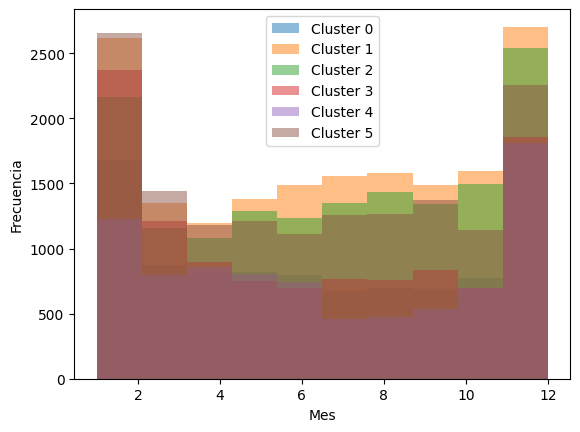

In [ ]:
#Danilo



# Cargar el dataset desde un archivo CSV
df12 = pd.read_csv('/content/drive/MyDrive/Datos/Accidentalidad_Barranquilla_detalle_de_Veh_culos.csv')


# Preprocesar los datos
le = LabelEncoder()
df12['CLASE ACCIDENTE'] = le.fit_transform(df12['CLASE ACCIDENTE'])
df12['SERVICIO_VEHICULO_ACCIDENTADO'] = le.fit_transform(df12['SERVICIO_VEHICULO_ACCIDENTADO'])
df12['CLASE_VEHICULO_ACCIDENTADO'] = le.fit_transform(df12['CLASE_VEHICULO_ACCIDENTADO'])
df12['DIRECCION ACCIDENTE'] = le.fit_transform(df12['DIRECCION ACCIDENTE'])

# Seleccionar los atributos relevantes
X = df12[['MES_ACCIDENTE', 'CLASE ACCIDENTE', 'CLASE_VEHICULO_ACCIDENTADO', 'DIRECCION ACCIDENTE']]

# Entrenar el modelo de clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Agregar las etiquetas de cluster al dataframe
df12['cluster'] = labels

# Imprimir el número de elementos en cada cluster
print("# Elementos cada cluster: ",df12['cluster'].value_counts())

# Visualizar los centroides de los clusters
print("Cluster: ",kmeans.cluster_centers_)


## New 
stats = X.groupby(labels).describe()
print("stats: ", stats)
for i in range(kmeans.n_clusters):
    plt.hist(X[labels == i]['MES_ACCIDENTE'], alpha=0.5, label='Cluster {}'.format(i))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

# # Seleccionar dos atributos para visualizar en la gráfica
# attr1 = 'CLASE ACCIDENTE'
# attr2 = 'MES_ACCIDENTE'

# # Crear una gráfica de dispersión con colores diferentes para cada cluster
# plt.scatter(X[attr1], X[attr2], c=labels, cmap='rainbow')
# plt.xlabel(attr1)
# plt.ylabel(attr2)
# plt.show()

In [ ]:
#Danilo 2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Datos/Accidentalidad_Barranquilla_detalle_de_Veh_culos.csv')

# cols_to_keep = ['MES_ACCIDENTE', 'CLASE ACCIDENTE', 'CLASE_VEHICULO_ACCIDENTADO', 'DIRECCION ACCIDENTE']
# data = data[cols_to_keep].dropna()

data['MES_ACCIDENTE'] = pd.Categorical(data['MES_ACCIDENTE'], categories=range(1,13), ordered=True)

data = pd.get_dummies(data, columns=['CLASE ACCIDENTE', 'DIRECCION ACCIDENTE', 'CLASE_VEHICULO_ACCIDENTADO', 'SERVICIO_VEHICULO_ACCIDENTADO'])


# scaler = StandardScaler()
# data_norm = scaler.fit_transform(data)

# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(data_norm)
#     inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
# plt.plot(range(1, 11), inertia)
# plt.xlabel('Número de clusters')
# plt.ylabel('Inertia')
# plt.show()

# kmeans = KMeans(n_clusters=4, random_state=0).fit(data_norm)
# labels = kmeans.labels_

# data['cluster'] = labels
# clusters = data.groupby('cluster').mean()
# print(clusters)



In [ ]:
# # Crea un objeto StandardScaler
# scaler = StandardScaler()

# # Divide el dataset en lotes más pequeños
# batch_size = 500
# num_batches = int(np.ceil(len(data) / batch_size))

# # Aplica el escalado en cada lote
# scaled_data = []
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = min((i + 1) * batch_size, len(data))
#     batch_data = data[batch_start:batch_end]
#     batch_scaled_data = scaler.fit_transform(batch_data)
#     scaled_data.append(batch_scaled_data)

# # Combina los lotes escalados en un solo array
# data_norm = np.concatenate(scaled_data, axis=0)

# print(data_norm)

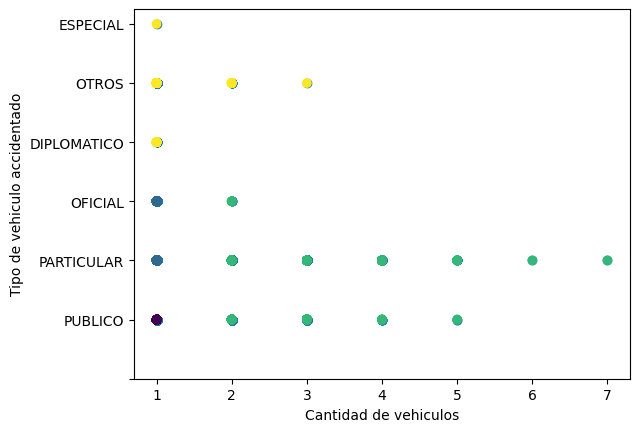

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Publico = 1, Particular = 2, Oficial = 3,Diplomatico = 4, Otros = 5 , ESPECIAL = 6
df10 = df.copy()
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('PUBLICO', 1)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('PARTICULAR', 2)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('OFICIAL', 3)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('DIPLOMATICO', 4)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('OTROS', 5)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('No Aplica', 5)
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = df10['SERVICIO_VEHICULO_ACCIDENTADO'].replace('ESPECIAL', 6)
df10

# convertir la columna a tipo numérico
df10['SERVICIO_VEHICULO_ACCIDENTADO'] = pd.to_numeric(df10['SERVICIO_VEHICULO_ACCIDENTADO'])
# Seleccionar las columnas para el clustering
X = df10[['SERVICIO_VEHICULO_ACCIDENTADO', 'CANTIDAD_VEHICULOS']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo de K-means 
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_scaled)

# Obtener las etiquetas de cluster
labels = kmeans.labels_
labels

# Crear una gráfica de dispersión con los datos originales
plt.scatter(X.iloc[:,1],X.iloc[:,0] )

# Colorear los puntos según su etiqueta de cluster
plt.scatter(X.iloc[:,1],X.iloc[:,0], c=labels)
# Agregar leyenda

labels = ["",'PUBLICO', 'PARTICULAR', 'OFICIAL', 'DIPLOMATICO', 'OTROS', 'ESPECIAL']

# Agregar etiquetas a los ejes
plt.xlabel('Cantidad de vehiculos')
plt.ylabel('Tipo de vehiculo accidentado')
plt.yticks(range(len(labels)), labels)

# Mostrar la gráfica
plt.show()


##Graficas

In [ ]:
# agrupar los datos por clase de vehículo y sumar la cantidad de vehículos
grouped_data = df.groupby('CLASE_VEHICULO_ACCIDENTADO')['CANTIDAD_VEHICULOS'].sum().reset_index()

# identificar las filas con suma menor a 100
sum_others = 100
other_classes = grouped_data[grouped_data['CANTIDAD_VEHICULOS'] < sum_others]['CLASE_VEHICULO_ACCIDENTADO'].tolist()

# reemplazar las clases con suma menor a 10 por "otros"
df.loc[df['CLASE_VEHICULO_ACCIDENTADO'].isin(other_classes), 'CLASE_VEHICULO_ACCIDENTADO'] = 'OTROS'

# recalcular la suma para la columna "CANTIDAD_VEHICULOS"
grouped_data = df.groupby('CLASE_VEHICULO_ACCIDENTADO')['CANTIDAD_VEHICULOS'].sum().reset_index()

# ordenar los datos según la cantidad de vehículos en orden descendente
grouped_data = grouped_data.sort_values('CANTIDAD_VEHICULOS', ascending=False)

# crear la gráfica
fig = px.bar(grouped_data, x='CANTIDAD_VEHICULOS', y='CLASE_VEHICULO_ACCIDENTADO', orientation='h')

# mostrar la gráfica
fig.show()



In [ ]:
# Agrupar el dataset por MES_ACCIDENTE y sumar la cantidad de accidentes por mes
grouped_data = df.groupby('MES_ACCIDENTE')['CANTIDAD_VEHICULOS'].sum().reset_index()

meses_dict = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

df['MES_ACCIDENTE'] = df['MES_ACCIDENTE'].map(meses_dict)
# Crear un objeto de figura
fig = go.Figure()

# Agregar un objeto de tipo gráfico de barras a la figura
fig.add_trace(go.Bar(
    x=grouped_data['MES_ACCIDENTE'], # establecer el eje x como los meses
    y=grouped_data['CANTIDAD_VEHICULOS'], # establecer el eje y como la cantidad de accidentes
))

# Establecer el título de la gráfica y los ejes
#fig.update_layout(title='Cantidad de accidentes por mes', xaxis_title='Mes', yaxis_title='Cantidad de accidentes')



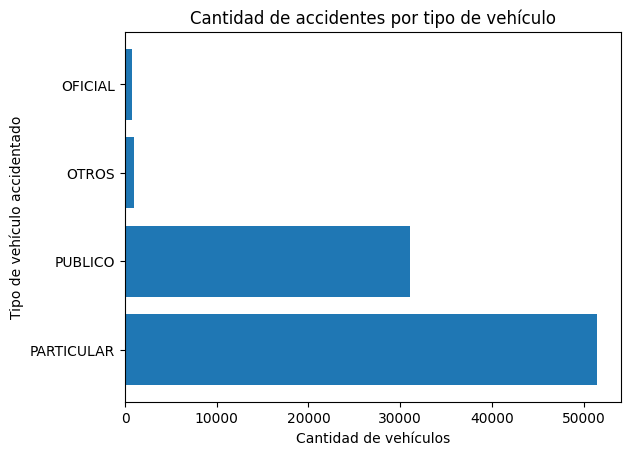

In [ ]:
# agrupar los datos por clase de vehículo y sumar la cantidad de vehículos
grouped_data = df.groupby('SERVICIO_VEHICULO_ACCIDENTADO')['CANTIDAD_VEHICULOS'].sum().reset_index()

# identificar las filas con suma menor a 10
sum_others = 100
other_services = grouped_data[grouped_data['CANTIDAD_VEHICULOS'] < sum_others]['SERVICIO_VEHICULO_ACCIDENTADO'].tolist()

# eliminar las filas con suma menor a 10
grouped_data = grouped_data[~grouped_data['SERVICIO_VEHICULO_ACCIDENTADO'].isin(other_services)]

# ordenar los datos según la cantidad de vehículos en orden descendente
grouped_data = grouped_data.sort_values('CANTIDAD_VEHICULOS')

# crear la gráfica
fig, ax = plt.subplots()
y_pos = np.arange(len(grouped_data))
ax.barh(y_pos, grouped_data['CANTIDAD_VEHICULOS'])
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_data['SERVICIO_VEHICULO_ACCIDENTADO'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad de vehículos')
ax.set_ylabel('Tipo de vehículo accidentado')
ax.set_title('Cantidad de accidentes por tipo de vehículo')

# mostrar la gráfica
plt.show()


#Infracciones



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/Comparendos_Electr_nicos_-_Control_y_Regulaci_n_Barranquilla.csv')
df.columns = [col.replace("\n", " ").strip() for col in df.columns]
df

,AÑO_INFRACCION,MES_INFRACCION,COD_INFRACCION,DESC_INFRACCION,TIPO_INFRACCION,SERVICIO_VEHICULO_INFRACTOR,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES
0,2015,1,C14,Transitar por los siguientes sitios restringid...,Tránsito,OFICIAL,CAMION,1
1,2015,1,C14,Transitar por los siguientes sitios restringid...,Tránsito,PARTICULAR,AUTOMOVIL,1
2,2015,1,C14,Transitar por los siguientes sitios restringid...,Tránsito,PARTICULAR,CAMION,13
3,2015,1,C14,Transitar por los siguientes sitios restringid...,Tránsito,PARTICULAR,VOLQUETA,3
4,2015,1,C14,Transitar por los siguientes sitios restringid...,Tránsito,PUBLICO,AUTOMOVIL,1
...,...,...,...,...,...,...,...,...
5616,2023,3,D04,No detenerse ante luz roja o amarilla de semáf...,Tránsito,PUBLICO,AUTOMOVIL,67
5617,2023,3,D04,No detenerse ante luz roja o amarilla de semáf...,Tránsito,PUBLICO,BUS,6
5618,2023,3,D04,No detenerse ante luz roja o amarilla de semáf...,Tránsito,PUBLICO,CAMION,7
5619,2023,3,D04,No detenerse ante luz roja o amarilla de semáf...,Tránsito,PUBLICO,CAMIONETA,12


In [ ]:
clases = df["DESC_INFRACCION"].unique()
print(clases)

['Transitar por los siguientes sitios restringidos o en horas prohibidas por la autoridad competente.  Además, el vehículo será inmovilizado'
 'Conducir un vehículo a velocidad superior a la máxima permitida, la cual deberá estar señalizada en forma sectorizada, la cual no podrá ser superior'
 'No respetar el paso de peatones que cruzan una vía en sitio permitido para ellos o no darles la prelación en las franjas para ello establecidas'
 'No detenerse ante luz roja o amarilla de semáforo,una señal de PARE,un semáforo intermitente en rojo. En el caso de motocicletas se procederá a la inmovilización hasta tanto no pague el valor de la multa o a la autoridad competente decida sobre si imposición en los términos de los art 135,136 CNT'
 'Estacionar un vehículo en los sitios prohibidos'
 'Bloquear una calzada o intersección con un vehículo, salvo cuando el bloqueo obedezca a la ocurrencia de un accidente']


In [ ]:
# Filtrar las filas que cumplen la condición
filas_a_eliminar = df.loc[df['AÑO_INFRACCION'] == 2023]

# Eliminar las filas filtradas del DataFrame original
df = df.drop(filas_a_eliminar.index)
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('Bloquear una calzada o intersección con un vehículo, salvo cuando el bloqueo obedezca a la ocurrencia de un accidente', "Bloqueo calzada o interseccion")
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('Estacionar un vehículo en los sitios prohibidos', "Estacionamiento en sitio prohibido")
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('Transitar por los siguientes sitios restringidos o en horas prohibidas por la autoridad competente.  Además, el vehículo será inmovilizado', "Transitar en sitios restringidos")
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('Conducir un vehículo a velocidad superior a la máxima permitida, la cual deberá estar señalizada en forma sectorizada, la cual no podrá ser superior', "Exceso de velocidad")
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('No respetar el paso de peatones que cruzan una vía en sitio permitido para ellos o no darles la prelación en las franjas para ello establecidas', "No respetar zebra")
df['DESC_INFRACCION'] = df['DESC_INFRACCION'].replace('No detenerse ante luz roja o amarilla de semáforo,una señal de PARE,un semáforo intermitente en rojo. En el caso de motocicletas se procederá a la inmovilización hasta tanto no pague el valor de la multa o a la autoridad competente decida sobre si imposición en los términos de los art 135,136 CNT', "Volarse semaforo")
df

,AÑO_INFRACCION,MES_INFRACCION,COD_INFRACCION,DESC_INFRACCION,TIPO_INFRACCION,SERVICIO_VEHICULO_INFRACTOR,CLASE_VEHICULO_INFRACTOR,CANTIDAD_INFRACCIONES
0,2015,1,C14,Transitar en sitios restringidos,Tránsito,OFICIAL,CAMION,1
1,2015,1,C14,Transitar en sitios restringidos,Tránsito,PARTICULAR,AUTOMOVIL,1
2,2015,1,C14,Transitar en sitios restringidos,Tránsito,PARTICULAR,CAMION,13
3,2015,1,C14,Transitar en sitios restringidos,Tránsito,PARTICULAR,VOLQUETA,3
4,2015,1,C14,Transitar en sitios restringidos,Tránsito,PUBLICO,AUTOMOVIL,1
...,...,...,...,...,...,...,...,...
5452,2022,12,D04,Volarse semaforo,Tránsito,PUBLICO,BUS,6
5453,2022,12,D04,Volarse semaforo,Tránsito,PUBLICO,BUSETA,2
5454,2022,12,D04,Volarse semaforo,Tránsito,PUBLICO,CAMION,13
5455,2022,12,D04,Volarse semaforo,Tránsito,PUBLICO,CAMIONETA,15


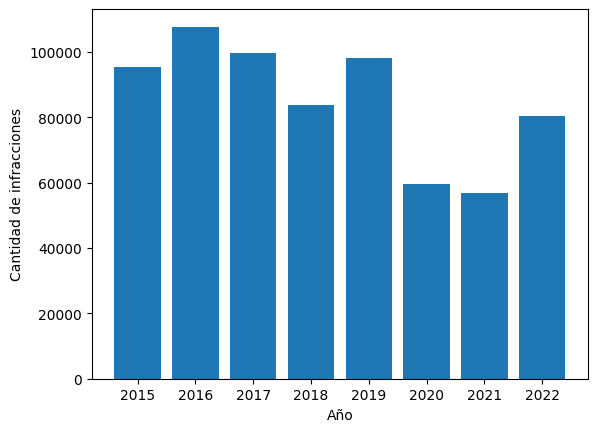

In [ ]:
infracciones_por_anio = df.groupby('AÑO_INFRACCION')['CANTIDAD_INFRACCIONES'].sum()

# graficar los resultados
plt.bar(infracciones_por_anio.index, infracciones_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de infracciones')
plt.show()

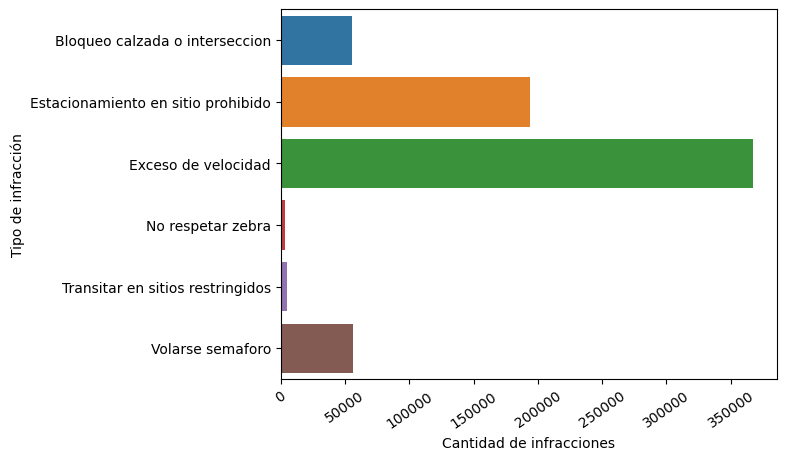

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# leer el dataframe desde un archivo


# agrupar los datos por tipo de infracción y contar la cantidad de infracciones de cada tipo
infracciones_por_tipo = df.groupby('DESC_INFRACCION')['CANTIDAD_INFRACCIONES'].sum().reset_index()


sns.barplot(x='CANTIDAD_INFRACCIONES', y='DESC_INFRACCION', data=infracciones_por_tipo)
plt.ylabel('Tipo de infracción')
plt.xlabel('Cantidad de infracciones')
plt.xticks(rotation=35)
plt.show()

